# Extra Model
## Logistic Regression
- On `salary_in_usd` but grouped to below average (0) and above average (1)

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import collections
from scipy import stats
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.model_selection import train_test_split
from math import sqrt
from datetime import datetime, timedelta
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
# for plotting confusion matrix
from sklearn.metrics import confusion_matrix
from collections import Counter


from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.svm import SVC, SVR
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold

In [2]:
dsdata = pd.read_csv('new_ds_salaries.csv')
ds_new = dsdata.copy()


# Exploring the numeric data in hr_data
ds_num = ds_new.select_dtypes(['int64', 'float64']).copy()
ds_num.head()


,work_year,salary,salary_in_usd,remote_ratio,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,employee_continentN,company_continentN
0,2020,70000,79833,0,1,1,2,1,0,0
1,2020,260000,260000,0,1,2,0,1,1,1
2,2020,85000,109024,1,1,2,1,1,0,0
3,2020,20000,20000,0,0,1,0,1,2,2
4,2020,150000,150000,1,1,2,2,1,2,2


In [3]:
ds_new.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,compare_avr_salary,experience_levelN,company_sizeN,employment_typeN,company_continent,employee_continent,job_type,domain,employee_continentN,company_continentN
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,...,1,1,2,1,EUROPE,EUROPE,Scientist,Data science,0,0
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,...,1,2,0,1,ASIA,ASIA,Scientist,Machine Learning,1,1
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,1,GB,...,1,2,1,1,EUROPE,EUROPE,Engineer,Data science,0,0
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,...,0,1,0,1,NORTH AMERICA,NORTH AMERICA,Analyst,Data science,2,2
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,1,US,...,1,2,2,1,NORTH AMERICA,NORTH AMERICA,Engineer,Machine Learning,2,2


## 1. Compare parameters with salary group

In [4]:
from sklearn.linear_model import LogisticRegression

X = ds_num.drop(["work_year", "salary", "salary_in_usd", "compare_avr_salary"], axis = 1)
Y = dsdata["salary_group"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=48)
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train,Y_train) 

Y_pred=logreg.predict(X_test) 

Y_pred 

array(['low', 'low-mid', 'low-mid', 'low', 'low', 'low', 'low-mid',
       'low-mid', 'mid', 'low-mid', 'low-mid', 'low', 'low', 'low', 'low',
       'low-mid', 'low-mid', 'low-mid', 'low', 'low', 'low-mid',
       'low-mid', 'low', 'mid', 'low', 'mid', 'low-mid', 'low-mid', 'mid',
       'mid', 'mid', 'low-mid', 'low', 'low-mid', 'mid', 'mid', 'low',
       'low', 'low', 'low-mid', 'low', 'low-mid', 'low-mid', 'mid', 'low',
       'mid', 'mid', 'mid', 'low', 'low-mid', 'low-mid', 'mid', 'mid',
       'low-mid', 'low-mid', 'mid', 'low-mid', 'low-mid', 'mid',
       'low-mid', 'mid', 'mid', 'low-mid', 'low-mid', 'low-mid', 'low',
       'mid', 'mid', 'low-mid', 'low-mid', 'mid', 'low', 'mid', 'mid',
       'low-mid', 'low', 'mid', 'low-mid', 'low-mid', 'mid', 'low', 'mid',
       'mid', 'low-mid', 'mid', 'low-mid', 'low-mid', 'low-mid', 'low',
       'low', 'low-mid', 'mid', 'low-mid', 'mid', 'low', 'low-mid',
       'low-mid', 'mid', 'mid', 'mid', 'low-mid', 'low', 'low', 'low-mid',
  

In [5]:
print("Accuracy:",accuracy_score(Y_test, Y_pred)) 

Accuracy: 0.48633879781420764


In [6]:
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

cnf_matrix 

array([[ 0,  0,  2,  0,  0,  0],
       [ 0, 37, 21,  2,  0,  0],
       [ 0, 18, 29, 21,  0,  0],
       [ 0,  2, 17, 23,  0,  0],
       [ 0,  0,  5,  4,  0,  0],
       [ 0,  0,  1,  1,  0,  0]], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

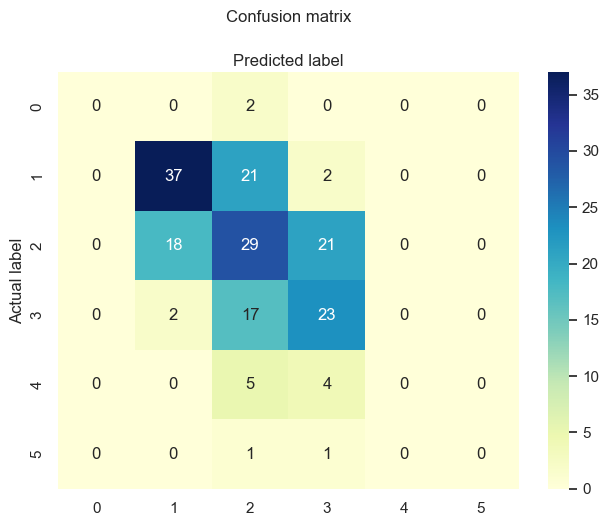

In [7]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

### 1.1 Apply K-Fold

In [8]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(logreg, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.441 (0.069)


In [9]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(logreg, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.447 (0.056)


### 1.2 Perform Gridsearch and test with K-Fold

In [10]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_log_acc = GridSearchCV(logreg, param_grid = grid_values,scoring = 'accuracy',n_jobs=-1, cv=cv)
grid_log_acc.fit(X_train, Y_train)

#Predict values based on new parameters
Y_pred_acc = grid_log_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred_acc)))

cnf_matrix = confusion_matrix(Y_test,Y_pred_acc)

Accuracy Score : 0.4918032786885246


Text(0.5, 427.9555555555555, 'Predicted label')

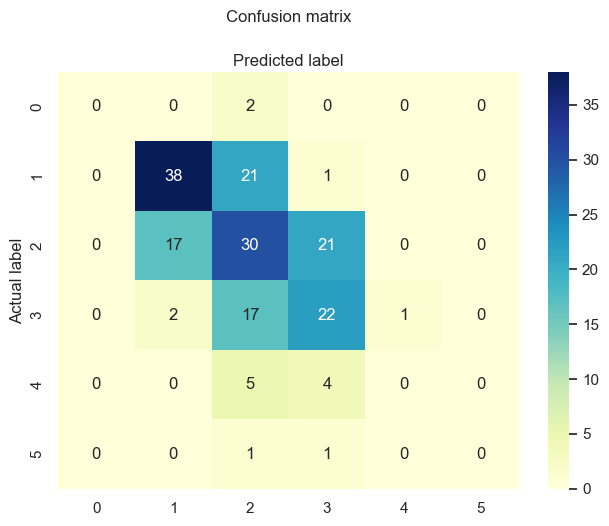

In [11]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

## 2. Compare parameters with salary average

In [12]:
X = ds_num.drop(["work_year", "salary", "salary_in_usd", "compare_avr_salary"], axis = 1)
Y = dsdata["compare_avr_salary"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)
logreg =  LogisticRegression(solver='liblinear') 
logreg.fit(X_train,Y_train) 

Y_pred=logreg.predict(X_test) 

Y_pred 

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1], dtype=int64)

Text(0.5, 427.9555555555555, 'Predicted label')

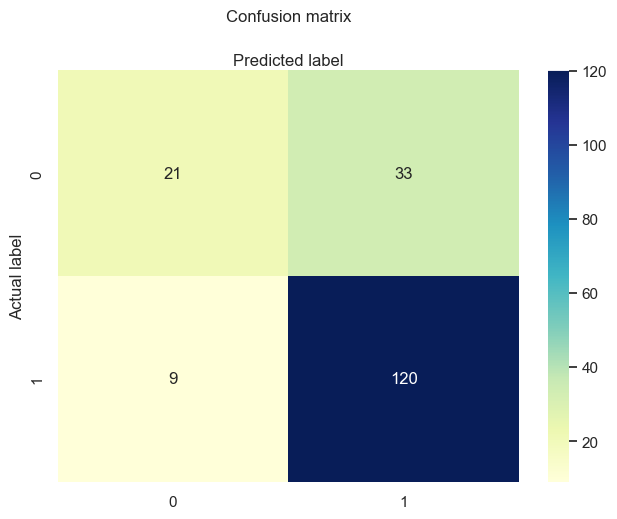

In [13]:
cnf_matrix = confusion_matrix(Y_test, Y_pred) 

class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

In [14]:
print("Accuracy:",accuracy_score(Y_test, Y_pred)) 

Accuracy: 0.7704918032786885


### 2.1 Applying K-Fold

In [15]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

scores = cross_val_score(logreg, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.771 (0.058)


In [16]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(logreg, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.771 (0.061)


### 2.2 Perform Gridsearch and test with K-Fold

In [17]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_log_acc = GridSearchCV(logreg, param_grid = grid_values,scoring = 'accuracy',n_jobs=-1, cv=cv)
grid_log_acc.fit(X_train, Y_train)

#Predict values based on new parameters
Y_pred_acc = grid_log_acc.predict(X_test)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(Y_test,Y_pred_acc)))

cnf_matrix = confusion_matrix(Y_test,Y_pred_acc)

Accuracy Score : 0.7650273224043715


Text(0.5, 427.9555555555555, 'Predicted label')

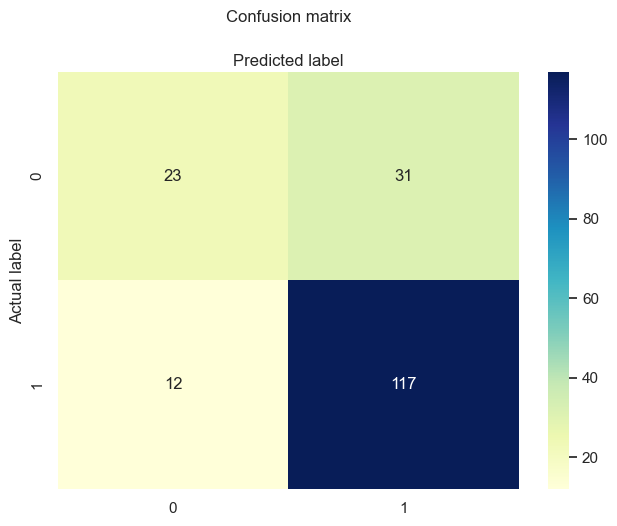

In [18]:
class_names=[0,1] # name  of classes 

fig, ax = plt.subplots() 

tick_marks = np.arange(len(class_names)) 

plt.xticks(tick_marks, class_names) 

plt.yticks(tick_marks, class_names) 

# create heatmap 
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g') 

ax.xaxis.set_label_position("top") 

plt.tight_layout() 

plt.title('Confusion matrix', y=1.1) 

plt.ylabel('Actual label') 

plt.xlabel('Predicted label')

As shown, true negatives increased at the cost of true postives decreasing.

## Summary

Using `remote ratio`, `experience level`, `company size`, `employment type`, `employee continent` and `company continent` to predict `salary group`:

                        Accuracy: 0.48633879781420764
    After K-fold and grid search: 0.4918032786885246
    
    
Using `remote ratio`, `experience level`, `company size`, `employment type`, `employee continent` and `company continent` to predict `salary compared to national average`:

                        Accuracy: 0.7704918032786885
    After K-fold and grid search: 0.7650273224043715

---
- It seems K-fold and grid search may inprove accuracy on outcomes with many more catagories than simplae outcome with only true/false.

- Overall, logistic Regression does not seem very accurate with many catagorical outcomes, but after splitting the outcomes into 2 groups it becomes some what better.